In [ ]:
# as the original dataset was too simple, i decide to use a more complex one to get some interesting results.
# towards the end we can see thatt i have created a linear regression, we can use other ML  techniques to learn 
# about the growth of the labour market in each particular area. 

In [48]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import matplotlib
# import scipy.stats as stats
from sklearn.linear_model import LinearRegression       # linear regression
from sklearn.model_selection import train_test_split    # train-test split
from sklearn.preprocessing import OneHotEncoder         # nominal variable

name_list = ['Statistical Area Level 2 (SA2) (2016 ASGS)',	'SA2 Code (2016 ASGS)',	'Dec-10',	'Mar-11',	'Jun-11',	'Sep-11',	'Dec-11',	'Mar-12',	'Jun-12',	'Sep-12',	'Dec-12',	'Mar-13',	'Jun-13',	'Sep-13',	'Dec-13',	'Mar-14',	'Jun-14',	'Sep-14',	'Dec-14',	'Mar-15',	'Jun-15', 'Sep-15',	'Dec-15', 'Mar-16',	'Jun-16', 'Sep-16',	'Dec-16',	'Mar-17',	'Jun-17', 'Sep-17',	'Dec-17', 'Mar-18',	'Jun-18', 'Sep-18',	'Dec-18','Mar-19',	'Jun-19', 'Sep-19',	'Dec-19', 'Mar-20',	'Jun-20', 'Sep-20',	'Dec-20','Mar-21',	'Jun-21', 'Sep-21'] 

# data = pd.read_excel('https://lmip.gov.au/PortalFile.axd?FieldID=2739724&.xlsx', sheet_name='SA4 & City Metro', parse_dates=True)
dataset = pd.read_excel('https://lmip.gov.au/PortalFile.axd?FieldID=3193957&.xlsx', sheet_name='Smoothed SA2 labour force', parse_dates=True, index_col=None, header=None)
# https://lmip.gov.au/PortalFile.axd?FieldID=3193957&.xlsx

In [49]:
dataset = dataset[3:]
num_l = np.arange(45)
name_dict = dict(zip(num_l, name_list))
pre_data = dataset # or dataset.copy(), i am using google colab which saves by variable Reference.
pre_data = pre_data.rename(columns = name_dict)

In [50]:
dataset[0:1]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45
3,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),2010-12-01 00:00:00,2011-03-01 00:00:00,2011-06-01 00:00:00,2011-09-01 00:00:00,2011-12-01 00:00:00,2012-03-01 00:00:00,2012-06-01 00:00:00,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-09-01 00:00:00,2013-12-01 00:00:00,2014-03-01 00:00:00,2014-06-01 00:00:00,2014-09-01 00:00:00,2014-12-01 00:00:00,2015-03-01 00:00:00,2015-06-01 00:00:00,2015-09-01 00:00:00,2015-12-01 00:00:00,2016-03-01 00:00:00,2016-06-01 00:00:00,2016-09-01 00:00:00,2016-12-01 00:00:00,2017-03-01 00:00:00,2017-06-01 00:00:00,2017-09-01 00:00:00,2017-12-01 00:00:00,2018-03-01 00:00:00,2018-06-01 00:00:00,2018-09-01 00:00:00,2018-12-01 00:00:00,2019-03-01 00:00:00,2019-06-01 00:00:00,2019-09-01 00:00:00,2019-12-01 00:00:00,2020-03-01 00:00:00,2020-06-01 00:00:00,2020-09-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-06-01 00:00:00,2021-09-01 00:00:00


In [51]:
pre_data.head(5)

,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,Dec-12,Mar-13,Jun-13,Sep-13,Dec-13,Mar-14,Jun-14,Sep-14,Dec-14,Mar-15,Jun-15,Sep-15,Dec-15,Mar-16,Jun-16,Sep-16,Dec-16,Mar-17,Jun-17,Sep-17,Dec-17,Mar-18,Jun-18,Sep-18,Dec-18,Mar-19,Jun-19,Sep-19,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,45
3,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),2010-12-01 00:00:00,2011-03-01 00:00:00,2011-06-01 00:00:00,2011-09-01 00:00:00,2011-12-01 00:00:00,2012-03-01 00:00:00,2012-06-01 00:00:00,2012-09-01 00:00:00,2012-12-01 00:00:00,2013-03-01 00:00:00,2013-06-01 00:00:00,2013-09-01 00:00:00,2013-12-01 00:00:00,2014-03-01 00:00:00,2014-06-01 00:00:00,2014-09-01 00:00:00,2014-12-01 00:00:00,2015-03-01 00:00:00,2015-06-01 00:00:00,2015-09-01 00:00:00,2015-12-01 00:00:00,2016-03-01 00:00:00,2016-06-01 00:00:00,2016-09-01 00:00:00,2016-12-01 00:00:00,2017-03-01 00:00:00,2017-06-01 00:00:00,2017-09-01 00:00:00,2017-12-01 00:00:00,2018-03-01 00:00:00,2018-06-01 00:00:00,2018-09-01 00:00:00,2018-12-01 00:00:00,2019-03-01 00:00:00,2019-06-01 00:00:00,2019-09-01 00:00:00,2019-12-01 00:00:00,2020-03-01 00:00:00,2020-06-01 00:00:00,2020-09-01 00:00:00,2020-12-01 00:00:00,2021-03-01 00:00:00,2021-06-01 00:00:00,2021-09-01 00:00:00
4,Braidwood,101021007,1773,1814,1838,1858,1876,1894,1913,1932,1949,1954,1938,1891,1847,1814,1801,1819,1849,1877,1883,1913,1917,1928,1951,1944,1917,1887,1890,1930,2008,2062,2069,2044,2042,2055,2090,2177,2205,2234,2254,2228,2204,2141,2085,2027
5,Karabar,101021008,5281,5389,5446,5492,5531,5517,5509,5497,5480,5438,5341,5158,4979,4850,4773,4784,4827,4855,4825,4854,4823,4807,4826,4769,4658,4555,4531,4597,4755,4855,4841,4755,4718,4714,4759,4926,4956,4985,4997,4908,4822,4690,4569,4444
6,Queanbeyan,101021009,6363,6508,6595,6668,6734,6747,6768,6784,6793,6789,6713,6535,6365,6292,6290,6388,6531,6588,6568,6628,6604,6592,6626,6559,6420,6298,6286,6401,6639,6783,6768,6653,6606,6610,6686,6933,6987,7043,7067,6948,6832,6640,6466,6289
7,Queanbeyan - East,101021010,3136,3223,3281,3332,3380,3374,3370,3365,3356,3339,3288,3186,3088,3021,2988,3006,3043,3067,3054,3079,3064,3055,3067,3033,2966,2910,2906,2959,3070,3147,3150,3107,3097,3111,3159,3287,3325,3343,3345,3279,3215,3123,3041,2957


In [52]:
use_data = pre_data[1:]

In [53]:
use_data.head(3)

,Statistical Area Level 2 (SA2) (2016 ASGS),SA2 Code (2016 ASGS),Dec-10,Mar-11,Jun-11,Sep-11,Dec-11,Mar-12,Jun-12,Sep-12,Dec-12,Mar-13,Jun-13,Sep-13,Dec-13,Mar-14,Jun-14,Sep-14,Dec-14,Mar-15,Jun-15,Sep-15,Dec-15,Mar-16,Jun-16,Sep-16,Dec-16,Mar-17,Jun-17,Sep-17,Dec-17,Mar-18,Jun-18,Sep-18,Dec-18,Mar-19,Jun-19,Sep-19,Dec-19,Mar-20,Jun-20,Sep-20,Dec-20,Mar-21,Jun-21,45
4,Braidwood,101021007,1773,1814,1838,1858,1876,1894,1913,1932,1949,1954,1938,1891,1847,1814,1801,1819,1849,1877,1883,1913,1917,1928,1951,1944,1917,1887,1890,1930,2008,2062,2069,2044,2042,2055,2090,2177,2205,2234,2254,2228,2204,2141,2085,2027
5,Karabar,101021008,5281,5389,5446,5492,5531,5517,5509,5497,5480,5438,5341,5158,4979,4850,4773,4784,4827,4855,4825,4854,4823,4807,4826,4769,4658,4555,4531,4597,4755,4855,4841,4755,4718,4714,4759,4926,4956,4985,4997,4908,4822,4690,4569,4444
6,Queanbeyan,101021009,6363,6508,6595,6668,6734,6747,6768,6784,6793,6789,6713,6535,6365,6292,6290,6388,6531,6588,6568,6628,6604,6592,6626,6559,6420,6298,6286,6401,6639,6783,6768,6653,6606,6610,6686,6933,6987,7043,7067,6948,6832,6640,6466,6289


In [54]:
numpy_data = use_data.to_numpy()
numpy_data2 = pre_data.to_numpy()

In [55]:
numpy_data[1][2:]

array([5281, 5389, 5446, 5492, 5531, 5517, 5509, 5497, 5480, 5438, 5341,
       5158, 4979, 4850, 4773, 4784, 4827, 4855, 4825, 4854, 4823, 4807,
       4826, 4769, 4658, 4555, 4531, 4597, 4755, 4855, 4841, 4755, 4718,
       4714, 4759, 4926, 4956, 4985, 4997, 4908, 4822, 4690, 4569, 4444],
      dtype=object)

In [59]:
numpy_data2[0][2:]

array([datetime.datetime(2010, 12, 1, 0, 0),
       datetime.datetime(2011, 3, 1, 0, 0),
       datetime.datetime(2011, 6, 1, 0, 0),
       datetime.datetime(2011, 9, 1, 0, 0),
       datetime.datetime(2011, 12, 1, 0, 0),
       datetime.datetime(2012, 3, 1, 0, 0),
       datetime.datetime(2012, 6, 1, 0, 0),
       datetime.datetime(2012, 9, 1, 0, 0),
       datetime.datetime(2012, 12, 1, 0, 0),
       datetime.datetime(2013, 3, 1, 0, 0),
       datetime.datetime(2013, 6, 1, 0, 0),
       datetime.datetime(2013, 9, 1, 0, 0),
       datetime.datetime(2013, 12, 1, 0, 0),
       datetime.datetime(2014, 3, 1, 0, 0),
       datetime.datetime(2014, 6, 1, 0, 0),
       datetime.datetime(2014, 9, 1, 0, 0),
       datetime.datetime(2014, 12, 1, 0, 0),
       datetime.datetime(2015, 3, 1, 0, 0),
       datetime.datetime(2015, 6, 1, 0, 0),
       datetime.datetime(2015, 9, 1, 0, 0),
       datetime.datetime(2015, 12, 1, 0, 0),
       datetime.datetime(2016, 3, 1, 0, 0),
       datetime.datetime(2

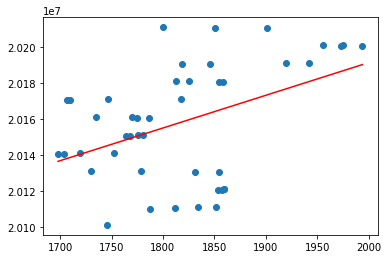

In [60]:

x = numpy_data[8][2:]
y = numpy_data2[0][2:].copy()

for i in range(len(y)):
  y[i] = int(y[i].strftime('%Y%m%d'))

plt.scatter(x,y)

lr = LinearRegression()
# fit the data using linear regression
# the reshaping is because the function expects more columns in x
model = lr.fit(np.array(x).reshape(-1,1),y)

# linear regression
b0 = model.intercept_
b1 = model.coef_[0]
x_range = [x.min(), x.max()]                      # get the bounds for x
y_range = [b0+b1*x_range[0], b0+b1*x_range[1]]    # get the bounds for y
plt.plot(x_range, y_range, c="red")